### Bagging

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

# Cria exemplos - default classes = 2
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

#criterion="gini"
#criterion="entropy"
dt = DecisionTreeClassifier(criterion="gini")
print(cross_val_score(dt, X, y, scoring='accuracy', cv=10).mean())


0.8090000000000002


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

#criterion="gini"
#criterion="entropy"
dt = DecisionTreeClassifier(criterion="entropy")
print(cross_val_score(dt, X, y, scoring='accuracy', cv=10).mean())


0.8130000000000001


In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
print(cross_val_score(lr, X, y, scoring='accuracy', cv=10).mean())

0.8379999999999999


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = BaggingClassifier() # 10 estimadores

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Acurácia: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acurácia: 0.861 (0.033)


### Bagging Hyperparameters

In [3]:
from matplotlib import pyplot

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def executar_teste(models):
    results, names = list(), list() # avaliar resultados e guardar em results

    for name, model in models.items():

        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)

        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


    pyplot.boxplot(results, tick_labels=names, showmeans=True)
    pyplot.show()

#### Verificar Número de Árvores

>10 0.865 (0.037)
>50 0.882 (0.040)
>100 0.880 (0.035)
>500 0.884 (0.037)
>1000 0.885 (0.037)
>5000 0.886 (0.038)


C:\Users\augba\AppData\Local\Temp\ipykernel_21672\2123088906.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


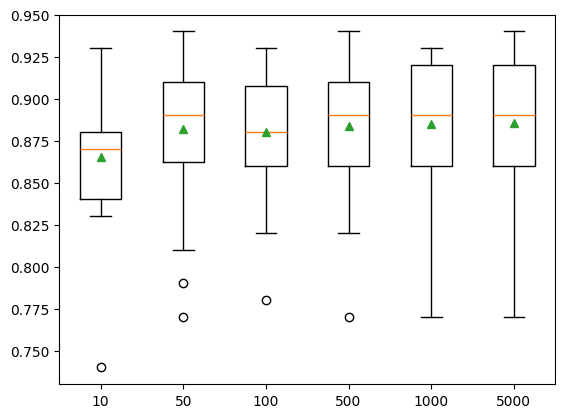

In [4]:
def get_models():
    models = dict()
    # definir numero de árvores
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

executar_teste(get_models())

#### Verificar Número Máximo de Exemplos

>0.1 0.816 (0.038)
>0.2 0.827 (0.042)
>0.3 0.850 (0.035)
>0.4 0.853 (0.041)
>0.5 0.857 (0.037)
>0.6 0.853 (0.044)
>0.7 0.859 (0.045)
>0.8 0.857 (0.036)
>0.9 0.862 (0.042)
>1.0 0.858 (0.033)


C:\Users\augba\AppData\Local\Temp\ipykernel_21672\2123088906.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


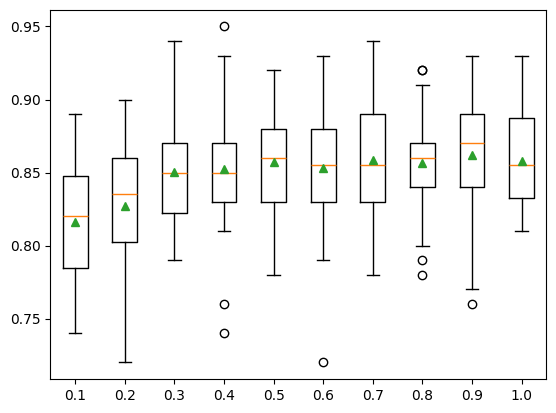

In [9]:
import numpy as np

def get_models():
    models = dict()
    # definir max_samples entre 10% e 100% com passo de 10%
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i)
    return models

executar_teste(get_models())

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#model = BaggingClassifier(max_samples=0.6,n_estimators=100) # 10 estimadores
model = BaggingClassifier(n_estimators=100) # 10 estimadores

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Acurácia: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acurácia: 0.876 (0.047)


#### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Acurácia: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Acurácia: 0.894 (0.034)


### Carregar Digits

In [12]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits 
 
digits = load_digits() 

#### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

nb_classifications = 100
rf_accuracy = []

for i in range(1, nb_classifications):
    a = cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10)
    m = a.mean()
    s = a.std()
    print(i,nb_classifications,m, s)
    rf_accuracy.append(m)

1 100 0.7389913097454996 0.03572693373753124
2 100 0.7329050279329609 0.04228660993916171
3 100 0.8152607076350094 0.05176905412354328
4 100 0.85752017380509 0.04111893220072697
5 100 0.8842644320297952 0.04075523453021617
6 100 0.8887150837988826 0.03739320444167555
7 100 0.9003848541278711 0.03537048346638937
8 100 0.8998603351955307 0.049616466939882885
9 100 0.9076256983240224 0.02157186893879469
10 100 0.9115176908752328 0.031325352988032885
11 100 0.9164959652389821 0.03606311449365303
12 100 0.9170639354438237 0.03579837312882689
13 100 0.917635009310987 0.0335637878571709
14 100 0.9204376163873368 0.030233861780721856
15 100 0.9220887647423961 0.02890711515482665
16 100 0.9293327126008689 0.030553298893767546
17 100 0.9365580384854126 0.029174632017180145
18 100 0.9310117939168217 0.029831470992247873
19 100 0.9393482309124768 0.019468859867498307
20 100 0.9337647423960274 0.030521628776243613
21 100 0.9437895716945995 0.0221873673317827
22 100 0.9421198013656115 0.028944171245

KeyboardInterrupt: 

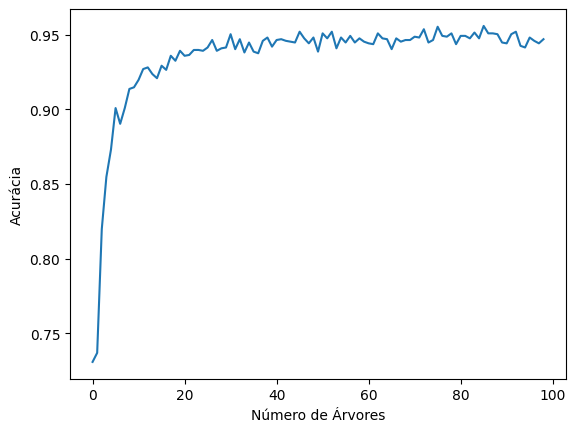

In [14]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(rf_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

#### Extra Trees Classifier

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

nb_classifications = 100
et_accuracy = []

for i in range(1, nb_classifications):
    a = cross_val_score(ExtraTreesClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10)
    m = a.mean()
    s = a.std()
    print(i,nb_classifications,m, s)
    et_accuracy.append(m)

1 100 0.7574146492861578 0.03426335093181085
2 100 0.7506859093730602 0.060723117152494455
3 100 0.8263904407200497 0.04279301437730393
4 100 0.8792706393544382 0.04452499612073158
5 100 0.8892706393544383 0.03521808950286276
6 100 0.9087523277467412 0.03149597991928912
7 100 0.8964928615766606 0.04026193214180901
8 100 0.9204220980757294 0.03440125694302718
9 100 0.9293451272501552 0.028410699252801038
10 100 0.9404500310366233 0.02369009429500584
11 100 0.9293451272501552 0.02329007004175294
12 100 0.9393544382371198 0.02338527486875297
13 100 0.9432309124767224 0.02812717314058043
14 100 0.9421353196772191 0.02293261709000411
15 100 0.9443575418994412 0.025222365141674807
16 100 0.9443668528864059 0.027985233694918357
17 100 0.9465735567970205 0.027281436143613457
18 100 0.9432495344506517 0.02796603755809552
19 100 0.9476908752327746 0.027389767058222103
20 100 0.9432650527622594 0.028394273342156277
21 100 0.958268156424581 0.02041850449214491
22 100 0.9543761638733705 0.026624206

KeyboardInterrupt: 

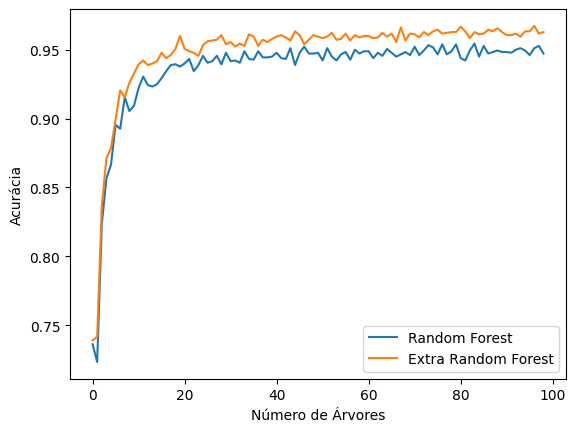

In [16]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(rf_accuracy,label="Random Forest")
plt.plot(et_accuracy,label="Extra Random Forest")

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.legend()

plt.show()

#### Feature Importance

In [17]:
from sklearn.datasets import make_classification
nb_samples = 1000

X, Y = make_classification(n_samples=nb_samples, n_features=20, n_informative=15, n_redundant=5, n_classes=2, n_clusters_per_class=5)


In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names


In [20]:
from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

RandomForestClassifier(random_state=0)

In [21]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tempo usado para computar as importâncias: {elapsed_time:.3f} segs")

Tempo usado para computar as importâncias: 0.013 segs


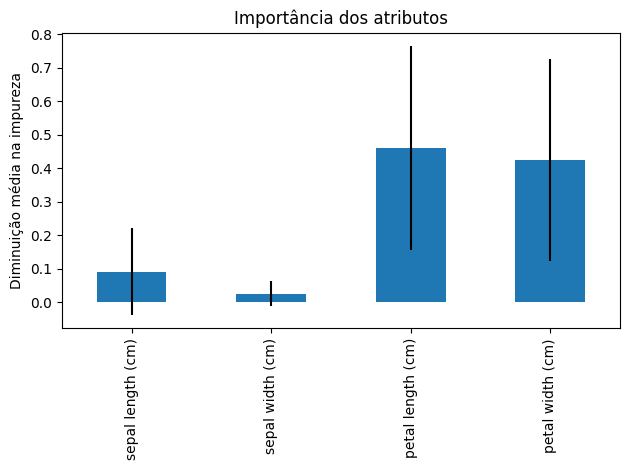

In [24]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Diminuição média na impureza")  # MDI = Mean decrease in impurity 
fig.tight_layout()

### AdaBoost

In [26]:
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

from sklearn.ensemble import AdaBoostClassifier

ab_accuracy = []

nb_classifications = 100

for i in range(1, nb_classifications):
    a = cross_val_score(AdaBoostClassifier(n_estimators=i, learning_rate=0.1), digits.data, digits.target, scoring='accuracy', cv=10)
    m = a.mean()
    s = a.std()
    print(i,nb_classifications,m, s)
    ab_accuracy.append(m)

1 100 0.1975512104283054 0.0036817455107168062
2 100 0.2904903786468032 0.01779820967829689
3 100 0.3289478584729982 0.048398349525689235
4 100 0.43975170701427685 0.08118639467383389
5 100 0.48595903165735566 0.08418841940582407
6 100 0.6032774674115456 0.08466099651229421
7 100 0.6372129112352576 0.06777115285888692
8 100 0.6388578522656735 0.04448719677033824
9 100 0.6132805710738671 0.06384780541441722
10 100 0.5994072004965859 0.0693935148873979
11 100 0.6182898820608318 0.06952787597678295
12 100 0.6361297330850404 0.06512925077678013
13 100 0.6605959031657356 0.06045242084283552
14 100 0.6756176288019863 0.05589191960086254
15 100 0.6951024208566107 0.05797944563446316
16 100 0.6834357541899442 0.059935538290612114
17 100 0.6762011173184357 0.06390464656943957
18 100 0.6956517690875235 0.05191071228365623
19 100 0.6884481688392301 0.0754551935871511
20 100 0.70792364990689 0.07304093923385253
21 100 0.7151272501551831 0.07926179261507904
22 100 0.7262631905648665 0.0713188765121

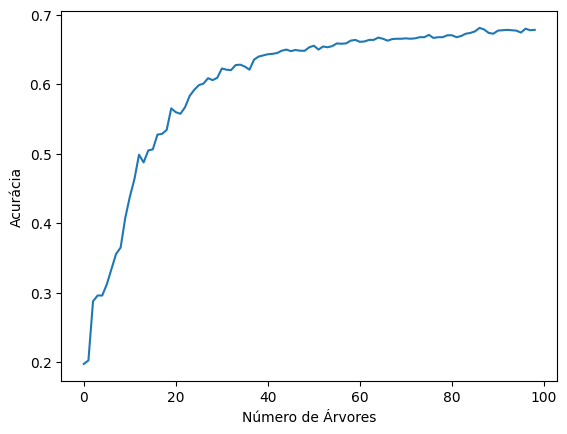

In [26]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ab_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

In [45]:
from sklearn.datasets import load_iris

iris = load_iris()
ab_accuracy2 = []

#ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
#print(cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10).mean())

nb_classifications = 100

for i in range(1, nb_classifications):
    ada = AdaBoostClassifier(n_estimators=i, learning_rate=0.1)
    a = cross_val_score(ada, iris.data, iris.target, scoring='accuracy', cv=10)
    m = a.mean()
    s = a.std()
    print(i,nb_classifications,m, s)
    ab_accuracy2.append(m)
 

1 100 0.6666666666666667 1.1102230246251565e-16
2 100 0.9533333333333334 0.052068331172711015
3 100 0.9533333333333334 0.052068331172711015
4 100 0.9400000000000001 0.08137703743822469
5 100 0.9400000000000001 0.08137703743822469
6 100 0.9533333333333334 0.052068331172711015
7 100 0.9333333333333333 0.07888106377466156
8 100 0.9333333333333333 0.07888106377466156
9 100 0.9333333333333333 0.07888106377466156
10 100 0.9333333333333333 0.07888106377466156
11 100 0.9333333333333333 0.07888106377466156
12 100 0.9333333333333333 0.07888106377466156
13 100 0.9333333333333333 0.07888106377466156
14 100 0.9333333333333333 0.07888106377466156
15 100 0.9333333333333333 0.07888106377466156
16 100 0.9333333333333333 0.07888106377466156
17 100 0.9333333333333333 0.07888106377466156
18 100 0.9333333333333333 0.07888106377466156
19 100 0.9333333333333333 0.07888106377466156
20 100 0.9333333333333333 0.07888106377466156
21 100 0.9333333333333333 0.07888106377466156
22 100 0.9333333333333333 0.078881063

KeyboardInterrupt: 

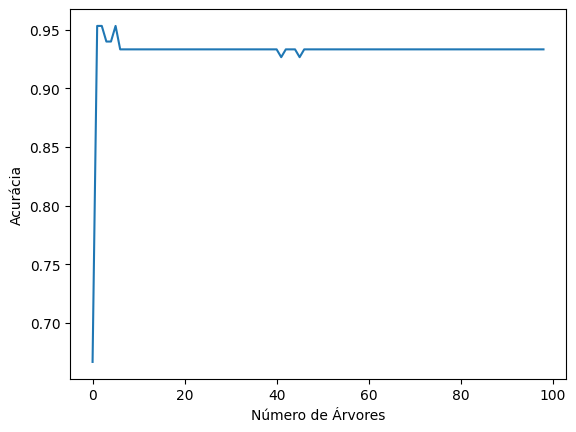

In [28]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ab_accuracy2)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

### Gradient Tree Boosting

In [39]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_accuracy = []

max_estimators = 100

for i in range(1, max_estimators):
    #score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=10.0/float(i)), X, Y, cv=10, scoring='accuracy')
    score = cross_val_score(GradientBoostingClassifier(n_estimators=i, learning_rate=0.1), X, Y, cv=10, scoring='accuracy')
    m = score.mean()
    s = score.std()
    print(i,nb_classifications,m, s)
    gb_accuracy.append(m)


1 100 0.85 0.06148170459575759
2 100 0.852 0.05381449618829483
3 100 0.8540000000000001 0.051419840528729756
4 100 0.85 0.053851648071345036
5 100 0.852 0.05381449618829484
6 100 0.8480000000000001 0.055281099844341
7 100 0.8480000000000001 0.05381449618829484
8 100 0.8560000000000001 0.05199999999999999
9 100 0.8540000000000001 0.0537028863283902
10 100 0.8539999999999999 0.053702886328390195
11 100 0.852 0.05599999999999999
12 100 0.852 0.0530659966456864
13 100 0.8540000000000001 0.052952809179494895
14 100 0.8600000000000001 0.051380930314660504
15 100 0.8560000000000001 0.05043808085167396
16 100 0.866 0.0537028863283902
17 100 0.8640000000000001 0.04800000000000001
18 100 0.8620000000000001 0.04512205669071393
19 100 0.866 0.0447660585711988
20 100 0.868 0.0457820925690384
21 100 0.8640000000000001 0.043634848458542874
22 100 0.8700000000000001 0.0440454310910905
23 100 0.8800000000000001 0.04732863826479694
24 100 0.8859999999999999 0.041999999999999996
25 100 0.884 0.0407921561

KeyboardInterrupt: 

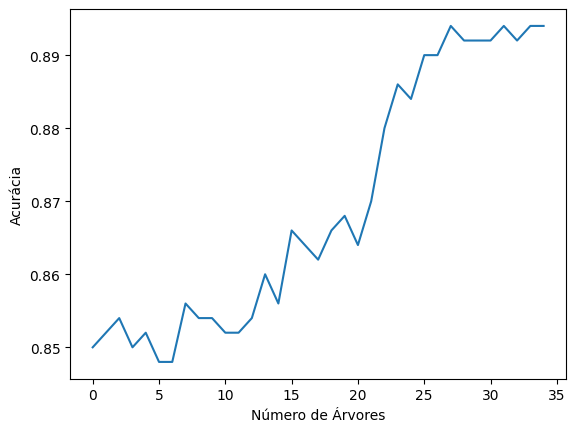

In [47]:

import matplotlib.pyplot as plt

plt.figure()

plt.plot(gb_accuracy)

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.show()

In [42]:
print(cross_val_score(GradientBoostingClassifier(n_estimators=50, learning_rate=0.01), X, Y, cv=10, scoring='accuracy').mean())

0.8480000000000001


### Ada Tree Boosting

1 100 0.6 0.030983866769659325
2 100 0.6799999999999999 0.06985699678629194
3 100 0.7260000000000001 0.05730619512757763
4 100 0.76 0.0737563556583431
5 100 0.776 0.06681317235396027
6 100 0.784 0.05713142742834279
7 100 0.78 0.0456070170039655
8 100 0.792 0.04995998398718716
9 100 0.792 0.064
10 100 0.79 0.04999999999999998
11 100 0.794 0.04903060268852502
12 100 0.8019999999999999 0.05015974481593778
13 100 0.792 0.06209669878504008
14 100 0.8 0.04979959839195493
15 100 0.808 0.04578209256903838
16 100 0.812 0.04118252056394799
17 100 0.818 0.04422668877499195
18 100 0.8160000000000001 0.042708313008125234
19 100 0.8099999999999999 0.028635642126552688
20 100 0.8160000000000001 0.033226495451672285
21 100 0.818 0.03399999999999999
22 100 0.8160000000000001 0.0366606055596467
23 100 0.8160000000000001 0.038781438859330615
24 100 0.8200000000000001 0.04289522117905442
25 100 0.82 0.03794733192202054
26 100 0.818 0.03944616584663203
27 100 0.8220000000000001 0.04237924020083417
28 100 0

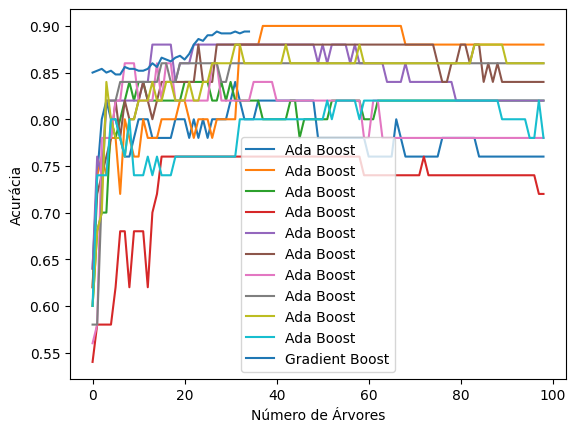

In [49]:
import matplotlib.pyplot as plt
ab_accuracy = []

nb_classifications = 100

for i in range(1, nb_classifications):
    a = cross_val_score(AdaBoostClassifier(n_estimators=i, learning_rate=0.1),  X, Y, scoring='accuracy', cv=10)
    m = a.mean()
    s = a.std()
    print(i,nb_classifications,m, s)
    ab_accuracy.append(a)
    
plt.figure()

plt.plot(ab_accuracy,label="Ada Boost")
plt.plot(gb_accuracy,label="Gradient Boost")

plt.ylabel('Acurácia')
plt.xlabel('Número de Árvores')
plt.legend()

plt.show()

### Outros Algoritmos

In [34]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=4, n_informative=3, n_redundant=1, n_classes=3)

In [54]:
a = cross_val_score(GradientBoostingClassifier(n_estimators=50, learning_rate=0.1), X, Y, cv=10, scoring='accuracy')
m = a.mean()
s = a.std()
print(m, s)

0.9040000000000001 0.03878143885933063


In [56]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

a = cross_val_score(LGBMClassifier(n_estimators=50, learning_rate=0.1, verbose=-1), X, Y, cv=10, scoring='accuracy')
m = a.mean()
s = a.std()
print(m, s)

0.9119999999999999 0.023999999999999994


In [57]:
from sklearn.ensemble import HistGradientBoostingClassifier
a = cross_val_score(HistGradientBoostingClassifier(learning_rate=0.1), X, Y, cv=10, scoring='accuracy')
m = a.mean()
s = a.std()
print(m, s)

0.914 0.015620499351813304


In [58]:
#!pip install xgboost
from xgboost import XGBClassifier

a = cross_val_score(XGBClassifier(n_estimators=50, learning_rate=0.1), X, Y, cv=10, scoring='accuracy')
m = a.mean()
s = a.std()
print(m, s)

0.9059999999999999 0.029732137494637


In [60]:
#!pip install catboost
from catboost import CatBoostClassifier
a = cross_val_score(CatBoostClassifier(n_estimators=50, learning_rate=0.1), X, Y, cv=10, scoring='accuracy')
m = a.mean()
s = a.std()
print(m, s)

0:	learn: 1.0149872	total: 7.83ms	remaining: 384ms
1:	learn: 0.9412521	total: 10.9ms	remaining: 263ms
2:	learn: 0.8732527	total: 17.9ms	remaining: 280ms
3:	learn: 0.8149019	total: 21.8ms	remaining: 251ms
4:	learn: 0.7654905	total: 25.2ms	remaining: 227ms
5:	learn: 0.7250424	total: 27.9ms	remaining: 204ms
6:	learn: 0.6843486	total: 34.3ms	remaining: 210ms
7:	learn: 0.6487798	total: 38ms	remaining: 199ms
8:	learn: 0.6168144	total: 41.2ms	remaining: 187ms
9:	learn: 0.5877280	total: 43.8ms	remaining: 175ms
10:	learn: 0.5627837	total: 47.6ms	remaining: 169ms
11:	learn: 0.5380658	total: 50.2ms	remaining: 159ms
12:	learn: 0.5174494	total: 52.7ms	remaining: 150ms
13:	learn: 0.5003261	total: 55.1ms	remaining: 142ms
14:	learn: 0.4819449	total: 57.5ms	remaining: 134ms
15:	learn: 0.4625493	total: 59.8ms	remaining: 127ms
16:	learn: 0.4482293	total: 62.2ms	remaining: 121ms
17:	learn: 0.4330532	total: 64.6ms	remaining: 115ms
18:	learn: 0.4233146	total: 67.1ms	remaining: 109ms
19:	learn: 0.4078944	tot

### Voting classifier

In [42]:
from sklearn.datasets import make_classification

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, n_classes=2)

In [70]:
X, Y = digits.data, digits.target

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter = 5000)
svc = SVC(kernel='poly', probability=True, max_iter = 5000)
dt = DecisionTreeClassifier()

classifiers = [('lr', lr),
               ('dt', dt),
               ('svc', svc)]

vc = VotingClassifier(estimators=classifiers, voting='soft')

In [75]:
from sklearn.model_selection import cross_val_score

a = []

t = cross_val_score(lr, X, Y, scoring='accuracy', cv=10)
a.append(t.mean())
m = t.mean()
s = t.std()
print("Acurácia LR:", m,s)

t = cross_val_score(dt, X, Y, scoring='accuracy', cv=10)
a.append(t.mean())
m = t.mean()
s = t.std()
print("Acurácia DT:", m,s)

t = cross_val_score(svc, X, Y, scoring='accuracy', cv=10)
a.append(t.mean())
m = t.mean()
s = t.std()
print("Acurácia SVR:", m,s)

t = cross_val_score(vc, X, Y, scoring='accuracy', cv=10)
a.append(t.mean())
m = t.mean()
s = t.std()
print("Acurácia VC:", m,s)

print(np.array(a))

Acurácia LR: 0.9270856610800745 0.02749057246120156
Acurácia DT: 0.828032278088144 0.03364351575029781
Acurácia SVR: 0.9777343265052763 0.020362249314521002
Acurácia VC: 0.9499006828057107 0.023499707964863625
[0.92708566 0.82803228 0.97773433 0.94990068]


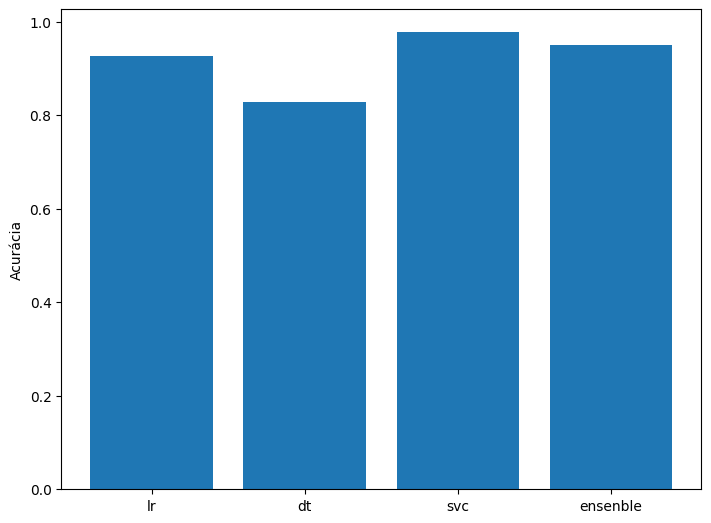

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','ensenble'],np.array(a))

#ax.set_xlabel("Features")

ax.set_ylabel("Acurácia")

plt.show()


In [47]:
vc = VotingClassifier(estimators=classifiers, voting='soft')
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia VC: 0.9526784605834884
[0.92708566 0.82691806 0.97773433 0.95547486 0.95267846]


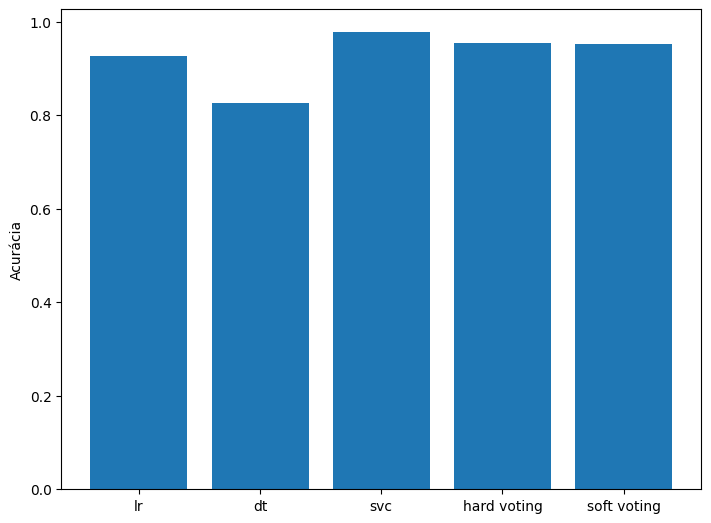

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','hard voting','soft voting'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [79]:
weights = [0.75, 0.5, 1.5]

vc = VotingClassifier(estimators=classifiers, weights=weights, voting='hard')
a.append(cross_val_score(vc, X, Y, scoring='accuracy', cv=10).mean())
print("Acurácia VC:", a[len(a)-1])

print(np.array(a))

Acurácia VC: 0.9777343265052763
[0.92708566 0.82803228 0.97773433 0.94990068 0.9627157  0.97773433]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (5,).

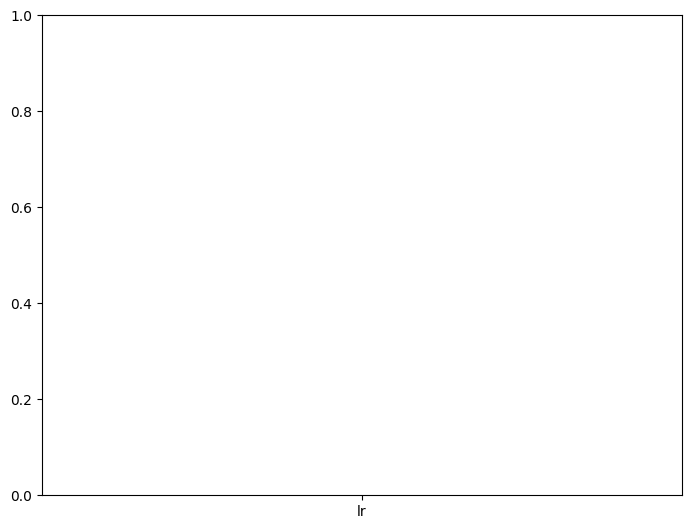

In [78]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(['lr','dt','svc','hard voting','soft voting', 'weighed sv'],np.array(a))

#ax.set_xlabel("Features")
ax.set_ylabel("Acurácia")

plt.show()


In [51]:
cross_val_score(RandomForestClassifier(n_estimators=i), digits.data, digits.target,  scoring='accuracy', cv=10).mean()


0.9454624456859093

In [52]:
### XGBOOSTING

In [53]:
### CATBOOSTING

### Usando Ensemble para Regressões

In [92]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1,noise=50.0)


In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -39.753 (2.608)
R2: 0.864


In [94]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -62.519 (5.080)
R2: 0.654


In [95]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -48.042 (2.898)
R2: 0.797


In [96]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2:  %.3f (%.3f)' % (mean(n_r2), std(n_r2)))

MAE: -45.154 (2.653)
R2:  0.819 (0.023)


In [97]:

model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -43.324 (3.402)
R2: 0.834


In [99]:
from lightgbm import LGBMRegressor #!pip install lightgbm

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -46.412 (2.937)
R2: 0.813


In [98]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -46.735 (2.560)
R2: 0.811


In [100]:
from xgboost import XGBRegressor #!pip install xgboost
from sklearn.model_selection import RepeatedKFold

model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -47.533 (2.994)
R2: 0.799


In [101]:
from catboost import CatBoostRegressor #!pip install catboost

model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('R2: %.3f'% n_r2)

MAE: -45.577 (2.780)
R2: 0.821
